The goal of this figure is to show zonal-mean-zonal wind impacts in time-latitude space. This view will allow us to see latitudes and times of the most significant volcanic impacts for fixed pressure levels. The latitude domain stretches from pole to pole, and the time domain covers the first 3 years post-eruption.

In [37]:
import sys
import pdb
import importlib
import numpy as np
import xarray as xr
import cmasher as cmr
import nclcmaps as ncm
import matplotlib as mpl
from matplotlib import rc
from datetime import datetime
import matplotlib.pyplot as plt
from cftime import DatetimeNoLeap as date
from matplotlib.dates import DateFormatter

plt.rcParams.update({
    'font.size'       : 13,   # Base font size
    'axes.labelsize'  : 13,   # Axis labels
    'xtick.labelsize' : 11,   # X-axis tick labels
    'ytick.labelsize' : 11,   # Y-axis tick labels
    'legend.fontsize' : 12,   # Legend font size
    'figure.titlesize': 16    # Figure title size
})
#rc('font',**{'family':'serif','serif':['Palatino']})
#rc('text', usetex=True)

plt.ioff()

sys.path.insert(1, '/global/homes/j/jhollo/repos/climate_analysis/CLDERA/TEM/limvar_analysis_NERSC')
import plotting_utils as putil
import compute_ensemble_stats as ces
importlib.reload(putil)
importlib.reload(ces)

<module 'compute_ensemble_stats' from '/global/homes/j/jhollo/repos/climate_analysis/CLDERA/TEM/limvar_analysis_NERSC/compute_ensemble_stats.py'>

In [40]:
importlib.reload(putil)
importlib.reload(ces)

# ----- define pressure level to plot, in hPa
pp = 15
pargs = {'plev':pp, 'method':'nearest'}

# ----- get U data
udir = putil.get_variable('U', skip_nosrctag=True)

# ----- extract data at pressure levels
u        = udir['ensmean'].sel(**pargs)
u_cf     = udir['cfmean'].sel(**pargs)
u_impact = udir['impact'].sel(**pargs)
u_pval   = udir['pval'].sel(**pargs)
u_coh    = udir['coherence'].sel(**pargs)

# ----- get dims
time, lat = u.time, u.lat
time = [datetime(t.year,t.month,t.day) for t in time.values]

# ----- set lat, time limits
latlim  = [-80, 80]
timelim = [time[0], datetime(time[0].year+2,time[0].month,time[0].day)]

# ----- set signifiance threshold
pcrit = 0.05

<>:58: SyntaxWarning: invalid escape sequence '\o'
<>:63: SyntaxWarning: invalid escape sequence '\o'
<>:58: SyntaxWarning: invalid escape sequence '\o'
<>:63: SyntaxWarning: invalid escape sequence '\o'
/tmp/ipykernel_2042934/1333490059.py:58: SyntaxWarning: invalid escape sequence '\o'
  icbar.set_label('$\overline{u}$ impact [m/s]')
/tmp/ipykernel_2042934/1333490059.py:63: SyntaxWarning: invalid escape sequence '\o'
  dummy = ax.plot([0,0],[0,0], color=ucolor, lw=ulw, alpha=ualph,label='counterfactual $\overline{{u}}$ every {} m/s ('.format(np.diff(ulev)[0]))


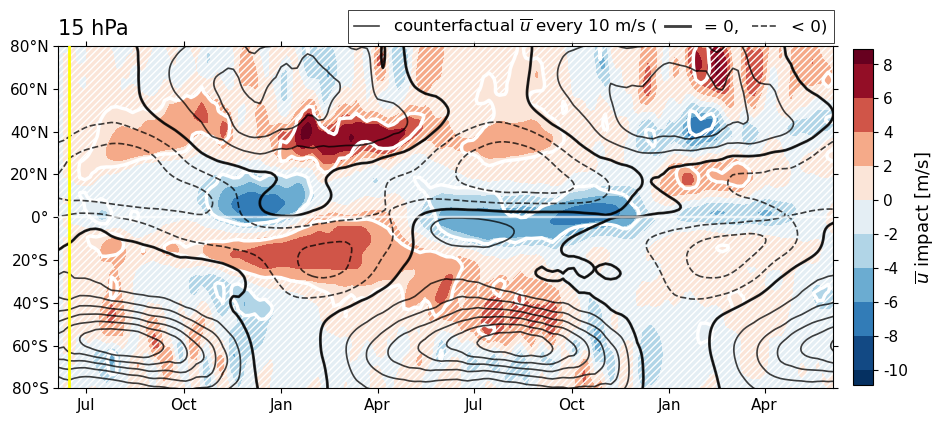

In [41]:
importlib.reload(putil)
importlib.reload(ces)

# ----- make figure, with vertically stacked axes per each pressure level
fig_width = 10
fig = plt.figure(figsize=(fig_width, fig_width/2.25))
ax = fig.add_subplot(111)
    
# ----- ploting settings
icmap       = 'RdBu_r' # impact colormap
isiglw      = 2.5      # significance contour linewidth
isigcolor   = 'w'      # significance contour color
ihatch      = '/////'  # insignificance hatching type
ihatchlw    = 1        # insignificance hatching linewidth
ihatchcolor = 'w'      # insignificance hatching color
ucolor      = 'k'      # contour color for U
ulw         = 1.2      # line width for U contours
ulwz        = ulw*1.7  # line width for U zero-line
ualph       = 0.75     # alpha for U contours
eqcolor     = 'w'      # equator line color 
eqls        = '-'      # equator linestyle
eqlw        = 1.75      # equator line width
eqalph      = 0.66      # equator alpha
ercolor     = 'yellow' # eruption line color 
erls        = '-'      # eruption linestyle
erlw        = 2        # eruption line width
cbheight = 0.756 
cbpos    = [0.92, (1-cbheight)/2-0.005, 
            0.02, cbheight] # colorbar position
mpl.rcParams['hatch.linewidth'] = ihatchlw
mpl.rcParams['hatch.color']     = ihatchcolor

                 
# ----- configure levels
ulev  = np.arange(-20, 61, 10)
ilev  = np.arange(-10, 9, 2)
inorm = putil.get_cmap_norm(ilev, 'twoslope')

    
# ==================== PLOT DATA ====================
# --- ensemble data
ax.contour(time, lat, u_cf, colors=ucolor, linewidths=ulw, levels=ulev, alpha=ualph, zorder=10)
ax.contour(time, lat, u_cf, colors=ucolor, linewidths=ulwz, levels=[0], alpha=ualph, zorder=10)
# --- impact data
icf = ax.contourf(time, lat, u_impact, cmap=icmap, levels=ilev, norm=inorm, extend='both')         
# --- pval           
ax.contourf(time, lat, u_pval, levels=[pcrit, u_pval.max()], hatches=[ihatch], colors='w',alpha=0)
ax.contour(time, lat, u_pval, colors=isigcolor, levels=[pcrit], linewidths=isiglw)

# --- equator
ax.axhline(y=0, color=eqcolor, ls=eqls, lw=eqlw, alpha=eqalph, zorder=11)
# --- eruption
ax.axvline(x=datetime(1991, 6, 15), color=ercolor, ls=erls, lw=erlw, zorder=12)
                 
# ----- make colorbars
# - impact
icbar = fig.colorbar(icf, cax=fig.add_axes(cbpos), orientation='vertical', location='right', extendrect=True)
icbar.set_label('$\overline{u}$ impact [m/s]')
icbar.set_ticklabels(np.array(ilev).astype(int))
icbar.set_ticks(ilev)

# ----- make legend
dummy = ax.plot([0,0],[0,0], color=ucolor, lw=ulw, alpha=ualph,label='counterfactual $\overline{{u}}$ every {} m/s ('.format(np.diff(ulev)[0]))
dummy = ax.plot([0,0],[0,0], color=ucolor, lw=ulwz, alpha=ualph,label='= 0, ')
dummy = ax.plot([0,0],[0,0], color=ucolor, lw=ulw, ls='--', alpha=ualph,label='< 0)')
leg = ax.legend(bbox_to_anchor=(1.011, 1.13), frameon=True, fancybox=False, edgecolor='k', ncol=3, columnspacing=0.5, handlelength=1.5)
leg.get_frame().set_linewidth(0.66)

# ----- make pressure label box
ax.text(0, 1.08, '{} hPa'.format(pp), transform=ax.transAxes, verticalalignment='top', fontsize=15, zorder=1000,
        bbox=dict(facecolor='none', edgecolor='none'))

# ----- format
ax.set_yticks([-80, -60, -40, -20, 0, 20, 40, 60, 80])
ax.set_ylim(latlim)
ax.set_xlim(timelim)
ax.tick_params(top=True, bottom=True, left=True, right=True, 
               labeltop=False, labelbottom=True, labelleft=True, labelright=False, 
               which='both')
putil.season_timeticks(ax, time, 'season')
putil.format_lat_ticks(ax, which='y')

# ---- overlay latbands and times for reference
if(0):
    ax.fill_between(x=time, y1=50, y2=30, color='cyan', interpolate=True, alpha=.33)
    ax.fill_between(x=time, y1=5, y2=-5, color='cyan', interpolate=True, alpha=.33)
    ax.fill_between(x=time, y1=-30, y2=-50, color='cyan', interpolate=True, alpha=.5)
    #ax.axvspan(datetime(1991,8,15), datetime(1991,11,15), alpha=0.5, color='cyan')
    #ax.axvspan(datetime(1992,7,15), datetime(1992,9,1), alpha=0.5, color='cyan')

plt.savefig('figs/lat_time_uimpact_{}hPa.png'.format(pp), dpi=200)
plt.show()